In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os
import seaborn as sns

In [2]:
df = pd.read_excel(r'.\banco_angelo.xlsx')
# replace values only in selected columns
df[['reg45a']] = df[['reg45a']].replace(',', '', regex=True).astype(float)
# replace values only in selected columns
df[['reg30a']] = df[['reg45a']].replace(',', '', regex=True).astype(float)

In [3]:
#### Deals with missing sta 
# calculate total income
rendaTotal = df[['reg45a', 'reg30a']].sum(axis=1, skipna=False)
# create data frame that it will be used
dados_clinicos = df[['gender', 'trauma_exp', 'age', 'DQ' , 'cape_tot', 'cape_PA_score', 'cape_PI_score', 'cape_BE_score']]
rendaTotal = pd.DataFrame(rendaTotal, columns=['total income'])
dados_clinicos = dados_clinicos.join(rendaTotal)
# drop data
indicesNA = dados_clinicos['cape_tot'].isna() # this is the pd.Series that recovers the data about what subjects that are dropped from the study
dados_clinicos = dados_clinicos[dados_clinicos['cape_tot'].notna()]
# ramdom sample
def random_sample_imputation(df):
   
    cols_with_missing_values = df.columns[df.isna().any()].tolist()

    for var in cols_with_missing_values:

        # extract a random sample
        random_sample_df = df[var].dropna().sample(df[var].isnull().sum(),
                                                    random_state=0, replace=True)
        # re-index the randomly extracted sample
        random_sample_df.index = df[
                df[var].isnull()].index

        # replace the NA
        df.loc[df[var].isnull(), var] = random_sample_df
    
    return df

dados_clinicos = random_sample_imputation(dados_clinicos)
dados_clinicos.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2249 entries, 2 to 2509
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   gender         2249 non-null   int64  
 1   trauma_exp     2249 non-null   float64
 2   age            2249 non-null   float64
 3   DQ             2249 non-null   float64
 4   cape_tot       2249 non-null   float64
 5   cape_PA_score  2249 non-null   float64
 6   cape_PI_score  2249 non-null   float64
 7   cape_BE_score  2249 non-null   float64
 8   total income   2249 non-null   float64
dtypes: float64(8), int64(1)
memory usage: 175.7 KB


In [16]:
with open('.//sujeitos_de_pesquisa.txt', 'r', newline='') as file:
    indices_sujeitos = file.readlines()

for index in range(len(indices_sujeitos)):
    indices_sujeitos[index] = indices_sujeitos[index].replace('sub-', '')
    indices_sujeitos[index] = indices_sujeitos[index].replace('\r\n', '')

selected_subjects = dados_clinicos[dados_clinicos.index.get_level_values(0).isin(indices_sujeitos)]
selected_subjects   

,gender,trauma_exp,age,DQ,cape_tot,cape_PA_score,cape_PI_score,cape_BE_score,total income


Text(0.5, 0, 'CAPE score total')

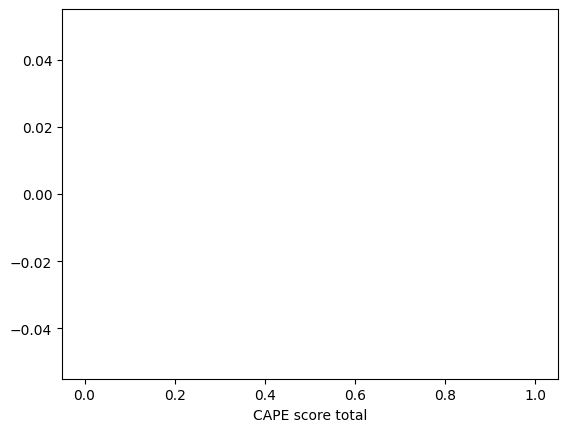

In [5]:
#plt.plot( df[['cape_tot']].to_numpy(), np.ones(len(df[['cape_tot']].to_numpy())), 'o')
plt.hist(selected_subjects[['cape_tot']].to_numpy())
plt.xlabel('CAPE score total')

Text(0.5, 0, 'CAPE score')

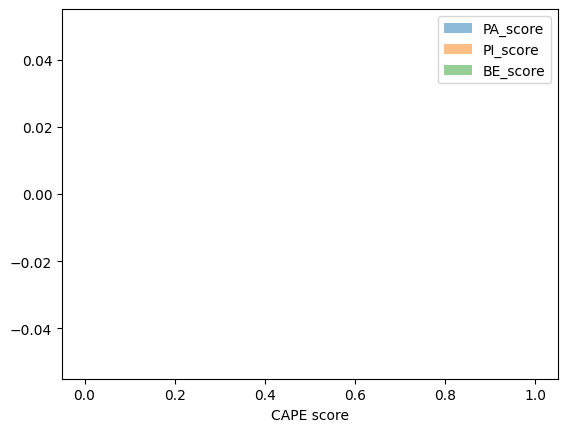

In [6]:
plt.hist(selected_subjects[['cape_PA_score']].to_numpy(), alpha=0.5, label='PA_score')
plt.hist(selected_subjects[['cape_PI_score']].to_numpy(), alpha=0.5, label='PI_score')
plt.hist(selected_subjects[['cape_BE_score']].to_numpy(), alpha=0.5, label='BE_score')
plt.legend()
plt.xlabel('CAPE score')

Text(0, 0.5, 'capr_total')

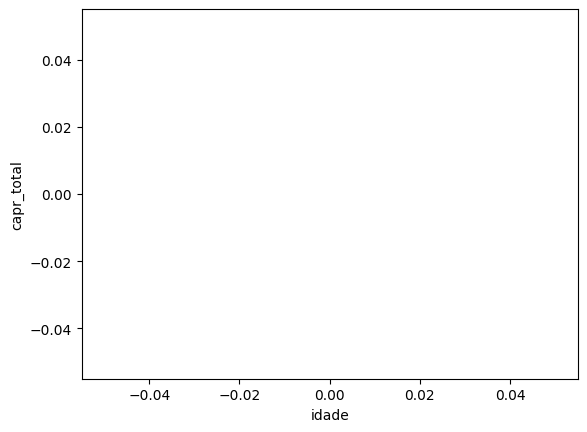

In [7]:
plt.scatter(selected_subjects[['age']].to_numpy(), selected_subjects[['cape_tot']].to_numpy())
plt.xlabel('idade')
plt.ylabel('capr_total')

([<matplotlib.axis.XTick at 0x234c53017f0>,
 [Text(-1, 0, 'sem trauma'),
  Text(0, 0, 'com trauma'),
  Text(1, 0, 'homem'),
  Text(2, 0, 'mulher')])

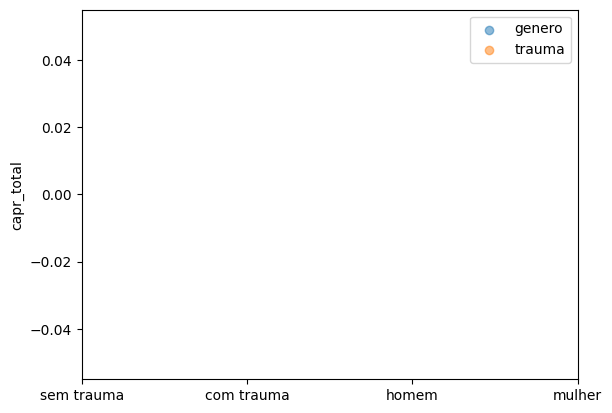

In [8]:
plt.scatter(selected_subjects[['gender']].to_numpy(), selected_subjects[['cape_tot']].to_numpy(), alpha=0.5, label = 'genero')
plt.scatter(selected_subjects[['trauma_exp']].to_numpy()-1, selected_subjects[['cape_tot']].to_numpy(), alpha=0.5, label='trauma')
plt.ylabel('capr_total')
plt.legend()
plt.xticks([-1, 0, 1, 2], ['sem trauma', 'com trauma', 'homem', 'mulher'])

Text(0, 0.5, 'cape_total')

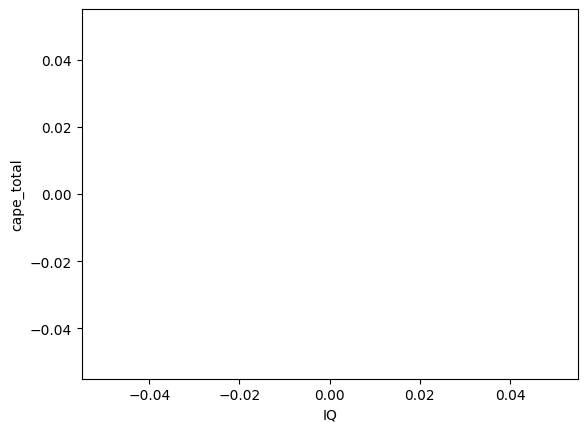

In [9]:
plt.scatter(selected_subjects[['DQ']].to_numpy(), selected_subjects[['cape_tot']].to_numpy())#, alpha=0.5, label='trauma')
plt.xlabel('IQ')
plt.ylabel('cape_total')
#df[['reg30a']].to_numpy(float)
#+df[['reg45a']]

Text(0, 0.5, 'cape_total')

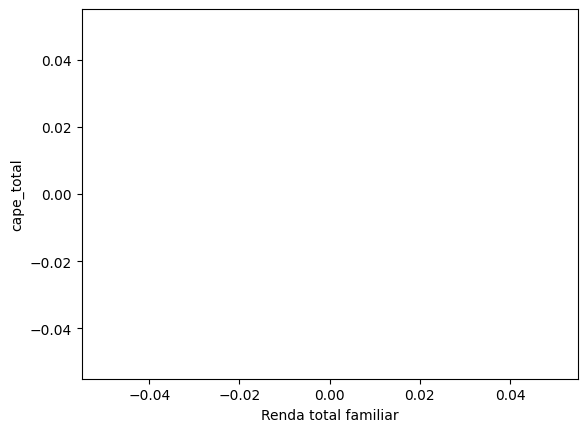

In [10]:
plt.scatter(selected_subjects[['total income']], selected_subjects[['cape_tot']].to_numpy())#, alpha=0.5, label='trauma')
plt.xlabel('Renda total familiar')
plt.ylabel('cape_total')

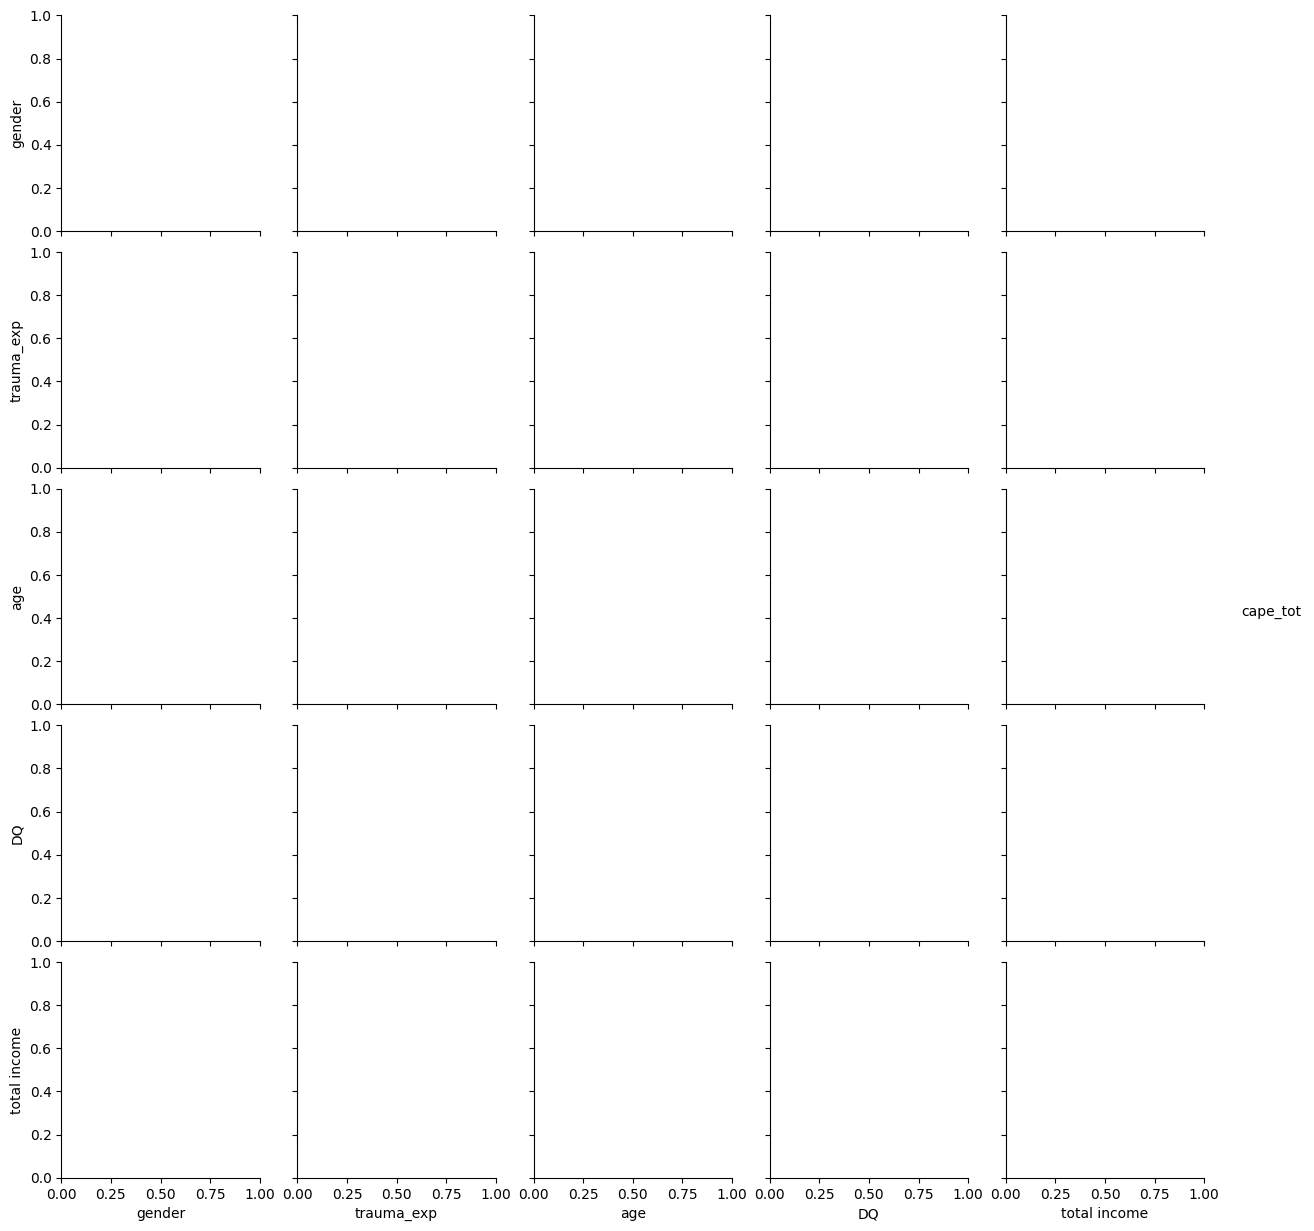

In [11]:
sns.pairplot(selected_subjects[['gender', 'trauma_exp', 'age', 'DQ' , 'cape_tot', 'total income']], hue='cape_tot')

Text(0, 0.5, 'PA_total')

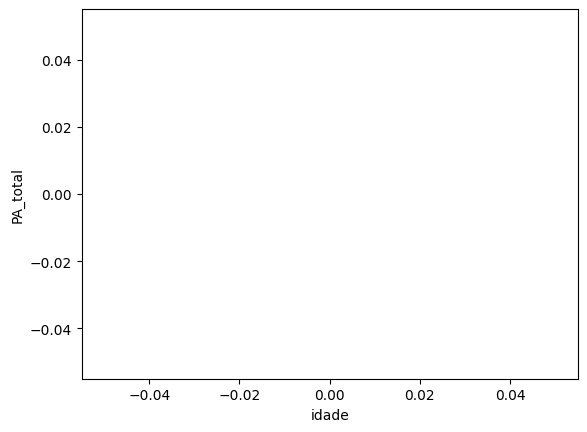

In [12]:
plt.scatter(selected_subjects[['age']].to_numpy(), selected_subjects[['cape_PA_score']].to_numpy())
plt.xlabel('idade')
plt.ylabel('PA_total')

([<matplotlib.axis.XTick at 0x234c8b45dc0>,
 [Text(-1, 0, 'sem trauma'),
  Text(0, 0, 'com trauma'),
  Text(1, 0, 'homem'),
  Text(2, 0, 'mulher')])

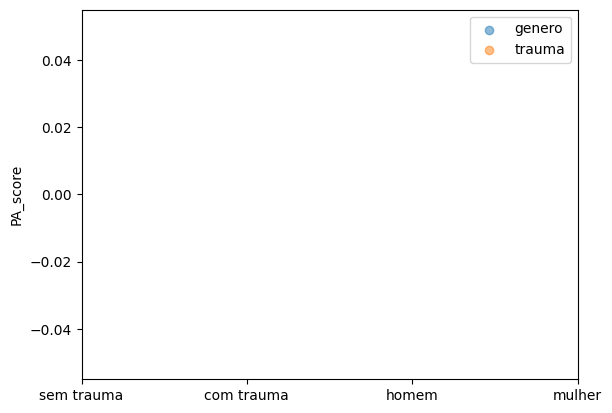

In [13]:
plt.scatter(selected_subjects[['gender']].to_numpy(), selected_subjects[['cape_PA_score']].to_numpy(), alpha=0.5, label = 'genero')
plt.scatter(selected_subjects[['trauma_exp']].to_numpy()-1, selected_subjects[['cape_PA_score']].to_numpy(), alpha=0.5, label='trauma')
plt.ylabel('PA_score')
plt.legend()
plt.xticks([-1, 0, 1, 2], ['sem trauma', 'com trauma', 'homem', 'mulher'])

(array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0.]),
 array([0.  , 0.05, 0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 , 0.45, 0.5 ,
        0.55, 0.6 , 0.65, 0.7 , 0.75, 0.8 , 0.85, 0.9 , 0.95, 1.  ]),
 <BarContainer object of 20 artists>)

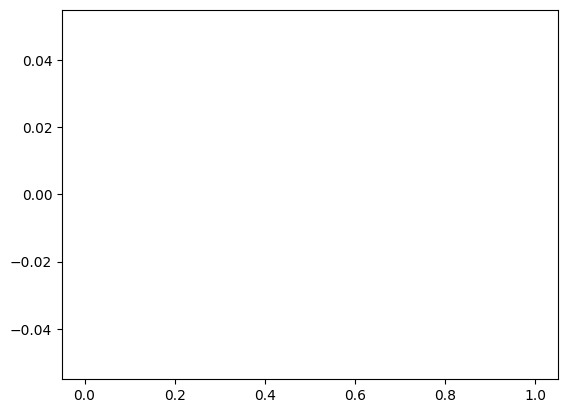

In [14]:
media = selected_subjects['age'].mean()

plt.hist(selected_subjects['DQ'], bins=20)